In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Disable warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [3]:
data = pd.read_csv("bank_note_authentication.txt", header = None)

In [4]:
data.columns = ["var", "skew", "curt", "entr", "auth"]

In [5]:
data

var      skew     curt     entr  auth
0     3.62160   8.66610  -2.8073 -0.44699     0
1     4.54590   8.16740  -2.4586 -1.46210     0
2     3.86600  -2.63830   1.9242  0.10645     0
3     3.45660   9.52280  -4.0112 -3.59440     0
4     0.32924  -4.45520   4.5718 -0.98880     0
...       ...       ...      ...      ...   ...
1367  0.40614   1.34920  -1.4501 -0.55949     1
1368 -1.38870  -4.87730   6.4774  0.34179     1
1369 -3.75030 -13.45860  17.5932 -2.77710     1
1370 -3.56370  -8.38270  12.3930 -1.28230     1
1371 -2.54190  -0.65804   2.6842  1.19520     1

[1372 rows x 5 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var     1372 non-null   float64
 1   skew    1372 non-null   float64
 2   curt    1372 non-null   float64
 3   entr    1372 non-null   float64
 4   auth    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
data.describe()

var         skew         curt         entr         auth
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000

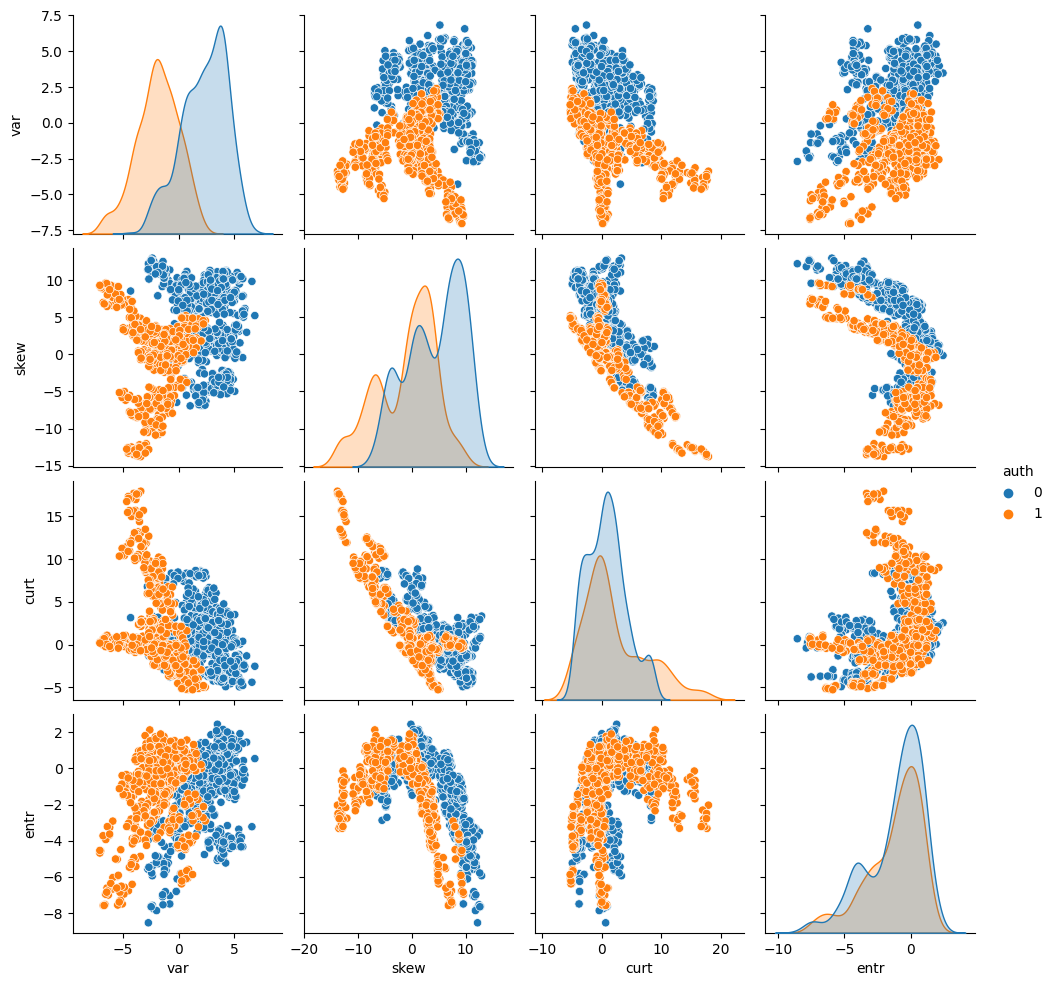

In [8]:
sns.pairplot(data, hue='auth')
plt.show()

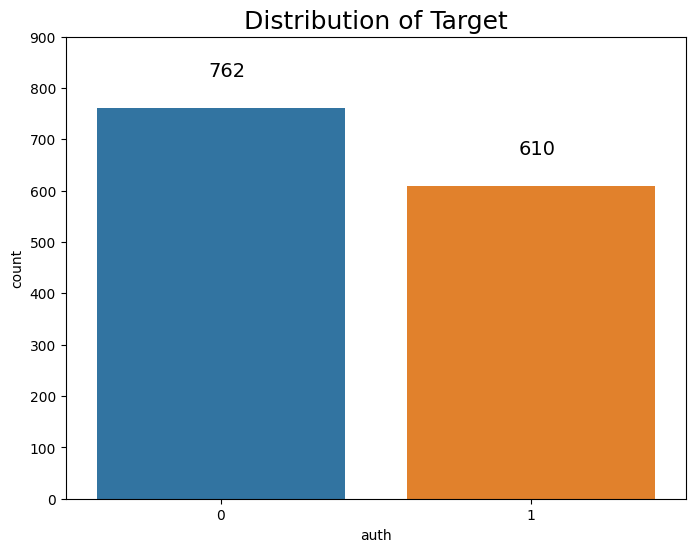

In [9]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Target', size=18)
sns.countplot(x=data['auth'])
target_count = data.auth.value_counts()
plt.annotate(text=str(target_count[0]), xy=(-0.04, 10 + target_count[0]), xytext=(-0.04, 10 + target_count[0] + 50), size=14)
plt.annotate(text=str(target_count[1]), xy=(0.96, 10 + target_count[1]), xytext=(0.96, 10 + target_count[1] + 50), size=14)
plt.ylim(0, 900)
plt.show()

In [10]:
nb_to_delete = target_count[0] - target_count[1]
data = data.sample(frac=1, random_state=42).sort_values(by='auth')
data = data[nb_to_delete:]
print(data['auth'].value_counts())

0    610
1    610
Name: auth, dtype: int64


In [11]:
x = data.loc[:, data.columns != 'auth']
y = data.loc[:, data.columns == 'auth']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [13]:
clf = LogisticRegression(solver='lbfgs', random_state=42, multi_class='auto')
clf.fit(x_train, y_train.values.ravel())

LogisticRegression(random_state=42)

In [14]:
y_pred = np.array(clf.predict(x_test))
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                        columns=["Pred.Negative", "Pred.Positive"],
                        index=['Act.Negative', "Act.Positive"])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = round((tn+tp)/(tn+fp+fn+tp), 4)
print(conf_mat)
print(f'\n Accuracy = {round(100*accuracy, 2)}%')

              Pred.Negative  Pred.Positive
Act.Negative            189              4
Act.Positive              0            173

 Accuracy = 98.91%


In [15]:
new_banknote = np.array([4.5, -8.1, 2.4, 1.4], ndmin=2)
new_banknote = scalar.transform(new_banknote)
print(f'Prediction:  Class{clf.predict(new_banknote)[0]}')
print(f'Probability [0/1]:  {clf.predict_proba(new_banknote)[0]}')

Prediction:  Class0
Probability [0/1]:  [0.64988756 0.35011244]
